In [1]:
import numpy as np

from lamp import *
from lamp.models import *
from lamp.utils import * 

In [2]:
def analyse_compression(model, datax, datay):
    decoded = model.predict(datax)

    examples = np.zeros(10, dtype=np.int64)
    for i in range(10):
        examples[i] = np.where(datay == i)[0][0]

    plt.figure(figsize=(12, 3))
    for i, x in enumerate(examples):
        plt.subplot(2, 10, i + 1)
        show_usps(datax[x])
        plt.subplot(2, 10, i + 11)
        show_usps(decoded[x])

    plt.show()

In [3]:
classes = list(range(10))
train_X, train_y = get_usps(classes, *load_usps("../data/USPS_train.txt"))
test_X, test_y = get_usps(classes, *load_usps("../data/USPS_test.txt"))

onehot = np.zeros((train_y.size, 10))
onehot[np.arange(train_y.size), train_y] = 1

mc = MultiClass()
mc.fit(train_X, onehot, hidden=100, nb_iter=1000, gradient_step=1e-2, batch_size=1000)

print(mc.score(train_X, train_y))

0.8976820737896036


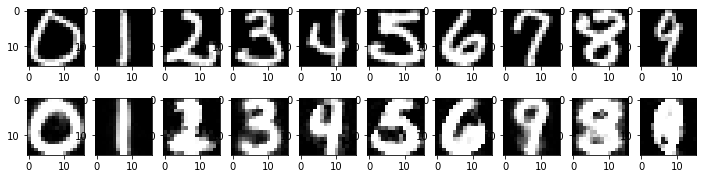

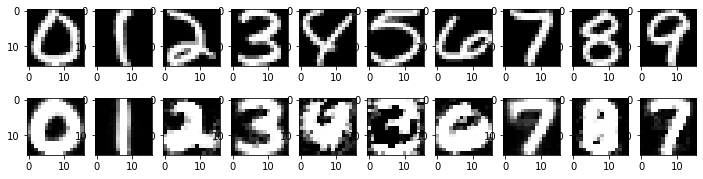

In [31]:
ae_batch = AutoEncoder()
ae_batch.fit(train_X, hidden=100, latent=10, nb_iter=1000, gradient_step=1e-4, batch_size=1000)

analyse_compression(ae_batch, train_X, train_y)
analyse_compression(ae_batch, test_X, test_y)

In [32]:
print(mc.score(ae_batch.predict(train_X), train_y))
print(mc.score(ae_batch.predict(test_X), test_y))

0.7132080647373474
0.6711509715994021
